In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as ta
import seaborn as sns
%matplotlib inline

In [6]:
X_train = pd.read_csv('Data/random_split/Train_small.csv')
y_train = X_train['up_down']
X_train = X_train.drop(columns = ['up_down','Unnamed: 0'])

X_test = pd.read_csv('Data/random_split/Test_small_features.csv')
X_test = X_test.drop(columns = ['Unnamed: 0'])
y_test = pd.read_csv('Data/random_split/Test_small_label.csv')

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21602 entries, 0 to 21601
Columns: 212 entries, Open to lag_return_96
dtypes: float64(204), int64(8)
memory usage: 34.9 MB


In [8]:
# scaling Volume
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
vol_scale_param = scaler.fit(X_train['Volume'].values.reshape(-1,1))

X_train['Volume_scaled'] = scaler.fit_transform(X_train['Volume'].values.reshape(-1,1), vol_scale_param)
X_train = X_train.drop(columns = ['Volume'])

X_test['Volume_scaled'] = scaler.fit_transform(X_test['Volume'].values.reshape(-1,1), vol_scale_param)
X_test = X_test.drop(columns = ['Volume'])


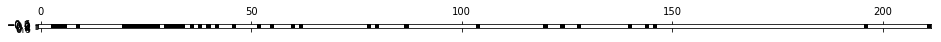

In [9]:
# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
#select = RFE(LogisticRegression(penalty="l1"), n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')



In [10]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)


NameError: name 'LogisticRegression' is not defined

In [ ]:
select.score(X_test, y_test)

In [19]:
print('Chosen Variables:')
print(X_train.columns[mask])

Chosen Variables:
Index(['Close', 'body', 'upper_tail', 'lower_tail', 'ATR', 'lag_return_1',
       'return_2', 'lag_return_2', 'return_3', 'lag_return_3', 'return_4',
       'lag_return_4', 'return_5', 'lag_return_5', 'lag_return_6', 'return_7',
       'lag_return_7', 'return_8', 'lag_return_8', 'lag_return_9',
       'lag_return_10', 'lag_return_11', 'lag_return_12', 'lag_return_14',
       'lag_return_17', 'return_19', 'lag_return_21', 'lag_return_22',
       'lag_return_30', 'lag_return_31', 'return_35', 'lag_return_43',
       'lag_return_51', 'lag_return_53', 'lag_return_55', 'lag_return_61',
       'lag_return_63', 'lag_return_64', 'lag_return_89', 'Volume_scaled'],
      dtype='object')
